In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys

# get the current directory of the Python file


# change the current working directory to the Python file directory
os.chdir("C:\\Users\\advai\\College Semesters\\22-23 Win\\data-driven analysis of LCK\\Testing\\")

# get the current working directory
cwd = os.getcwd()

# print the files in the current working directory
print(os.listdir(cwd))


['player_data.csv', 'test_polar.ipynb']


In [47]:

# Load player data
player_data = pd.read_csv('player_data.csv')

# Define the role specific categories and their 95th percentile values
categories = ['CS/min', 'KDA', 'Healing/Shielding', 'Vision Score']
percentiles = {'top': [8.0, 4.0, 1500, 20], 
               'jgl': [4.0, 4.0, 1000, 60], 
               'mid': [7.0, 4.0, 1000, 40], 
               'bot': [8.0, 5.0, 2000, 40], 
               'supp': [2.0, 5.0, 5000, 80]}
max_values = {'top': [9.0, 4.0, 1500, 20], 
               'jgl': [4.0, 4.0, 1000, 60], 
               'mid': [12.0, 6.0, 2100, 80], 
               'bot': [8.0, 5.0, 2000, 40], 
               'supp': [2.0, 5.0, 5000, 80]}


# Create a new DataFrame to store the percentile values
percentile_data = pd.DataFrame(percentiles, index=categories)

# Loop through each role and create a radar chart
role = "top"
    

In [59]:
import plotly.graph_objects as go

# data for the radar chart

player_name = "faker"
# get the row for the player from the DataFrame
player_row = player_data[player_data["name"] == player_name]

player_role = player_row["role"].iloc[0]

# Get the percentiles for the player's role
player_percentiles = percentiles[player_role]

# Get the max values for the player's role
player_max_values = max_values[player_role]

player_row = player_row.drop(["name", "role"], axis=1).iloc[0]
role_percentiles = percentiles[player_role]

# Calculate the normalized percentiles
normalized_percentiles = []
for i in range(len(player_percentiles)):
    if i == 0 or i == 1 or i == 2 or i == 3:  # For higher values are better
        normalized_percentiles.append(player_row.iloc[i] / player_max_values[i])
    #print(player_row.iloc[i] / player_max_values[i])
    else:  # For lower values are better
        normalized_percentiles.append(player_max_values[i] / player_row.iloc[i])

normalized_90 = []
for i in range(len(role_percentiles)):
    if i == 0 or i == 1 or i == 2 or i == 3:  # For higher values are better
        normalized_90.append(role_percentiles[i] / player_max_values[i])
    else:  # For lower values are better
        normalized_90.append(player_max_values[i] / role_percentiles[i])

fig = go.Figure()

# add the player's data to the chart
fig.add_trace(go.Scatterpolar(
      r=normalized_percentiles,
      theta=categories,
      fill='toself',
      name='Player Scores'
))

# add the role percentiles to the chart
fig.add_trace(go.Scatterpolar(
      r=normalized_90,
      theta=categories,
      fill='toself',
      name='90%ile Scores'
))

# customize the layout of the chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True
)

# show the chart
fig.show()


   name  csmin  KDA  healing-shielding role
0  zeus      9  3.5                700  top
      csmin      KDA  healing-shielding
0  0.001159 -0.00058          -0.927468


ValueError: x and y must have same first dimension, but have shapes (4,) and (2,)

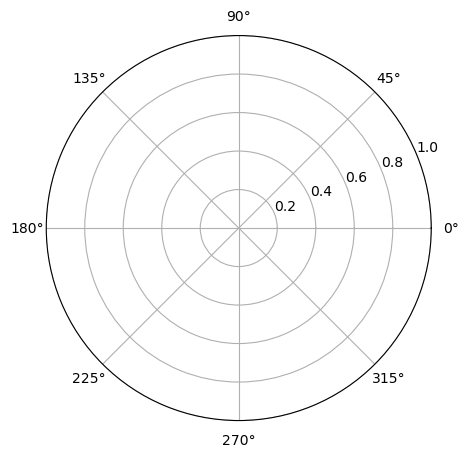

In [13]:
# Filter the player data to only include the current role
role_data = player_data[player_data['role'] == role]
print(role_data)
# Calculate the z-scores for each category based on the 95th percentile values
z_scores = (role_data[categories] - percentile_data[role]) / percentile_data[role].std()
print(z_scores)
# Calculate the mean z-score for each player
player_z_scores = z_scores.mean(axis=1)

# Create a polar plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)

# Define the angles and values for each category
angles = [n / float(len(categories)) * 2 * 3.14159 for n in range(len(categories))]
angles += angles[:1]
values = player_z_scores.tolist()
values += values[:1]

# Plot the radar chart
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids([a / 3.14159 * 180 for a in angles[:-1]], categories)
ax.set_title(f'{role} player performance', fontweight='bold', fontsize=14)
ax.grid(True)

plt.show()
